In [33]:
# plot photo with detected faces using opencv cascade classifier
# from google.colab.patches import cv2_imshow
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
from matplotlib import pyplot as plt
from IPython.display import display
import cv2
from skimage import io
from PIL import Image
# load the photograph
pixels = imread('data/tes2.jpg')
# url = "https://i.pinimg.com/736x/e8/74/83/e87483a7448165b5fc9a605327d243c5.jpg"
# pixels = io.imread(url)
# cv2_imshow(pixels)
# load the pre-trained model
classifier = CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# perform face detection
# classifier.detectMultiScale(pixels)
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
    # extract
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # draw a rectangle over the pixels
    rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)



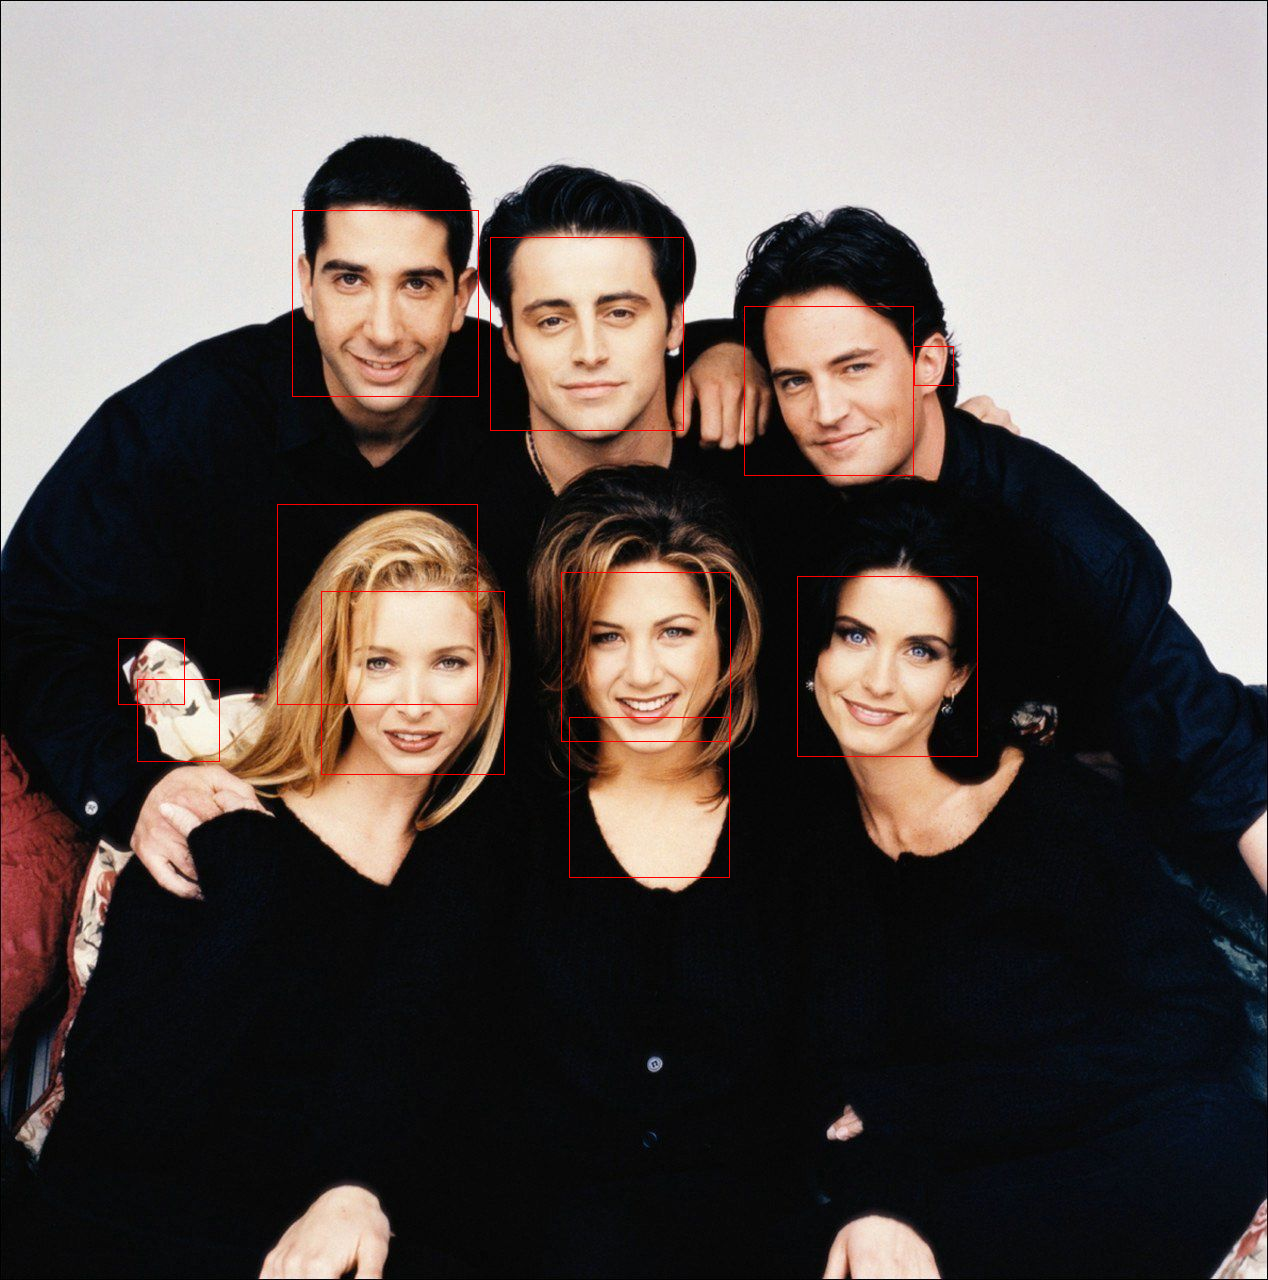

In [34]:
# show the image
def show_image(pixels, BGR):
    if BGR:
        img = cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB)
    else:
        img = pixels
    display(Image.fromarray(img, 'RGB'))
show_image(pixels, True)

In [75]:
# from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
 
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
  
  

  # load image from file
  image = Image.open(filename)
  # convert to RGB, if needed
  image = image.convert('RGB')
  # convert to array
  pixels = asarray(image)
  # create the detector, using default weights
  detector = MTCNN()
  # detect faces in the image
  results = detector.detect_faces(pixels)
  # extract the bounding box from the first face
  # x1, y1, width, height = results[0]['box']
  # # bug fix
  # x1, y1 = abs(x1), abs(y1)
  # x2, y2 = x1 + width, y1 + height
  # # extract the face
  # face = pixels[y1:y2, x1:x2]
  # # resize pixels to the model size
  # image = Image.fromarray(face)
  # image = image.resize(required_size)
  # face_array = asarray(image)
  print("Number of Detections: ", len(results))
  for box in results:
    x, y, width, height = box['box']
    x2, y2 = abs(x) + width, abs(y) + height
    rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
  return pixels
 
# load the photo and extract the face
# pixels = extract_face('data/tes2.jpg')

In [76]:
def extract_and_show_faces(filename):
    pixels = extract_face(filename)
    show_image(pixels, False)
# cv2.imshow('image',pixels)

### Using MTCNN with extract boxes of faces

In [62]:
#It seems we are gonna use MTCNN model cause it looks more robust as we can see from our simple experiment
# extract a single face from a given photograph and save in a text file or something
def extract_faces_boxes(filename):
  
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)

#     for box in results:
#         x, y, width, height = box['box']
#         x2, y2 = x + width, y + height
#         rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
    
#     for b in results:
#         print(b)
#         print()


    return results

def save_boxes(results, filename):
    with open(filename+".txt", 'w') as f:
        first = True
        for res in results:
            if not first:
                f.write('\n')
            first = False
            x, y, width, height = res['box']
            conf = res["confidence"]
            line = str(x) + " " + str(y) + " " + str(width) + " " + str(height) #+ " " + str(conf)
            f.write(line)

In [63]:
# results = extract_faces_boxes('data/tes2.jpg')

In [73]:
import glob, os
work_dir = "/home/ghosto/Documents/uni/INF634/Project_Friends_Face_Tracking/data/frames/"
save_dir = "/home/ghosto/Documents/uni/INF634/Project_Friends_Face_Tracking/data/labels/"
os.chdir(work_dir)

counter = 0
#WE ARE WORKING AS TEST 1 on frames 2400 to 2650
for file in glob.glob("*.jpg"):
#     print(work_dir + file)
#     print(save_dir + file.split(".")[0])
    counter += 1
    results = extract_faces_boxes(work_dir + file)
    save_boxes(results, save_dir + file.split(".")[0]) ##FALVIEN taking care of tracking with these results
    print(counter)
    if counter == 500:
        break
    


Number of Detections:  4


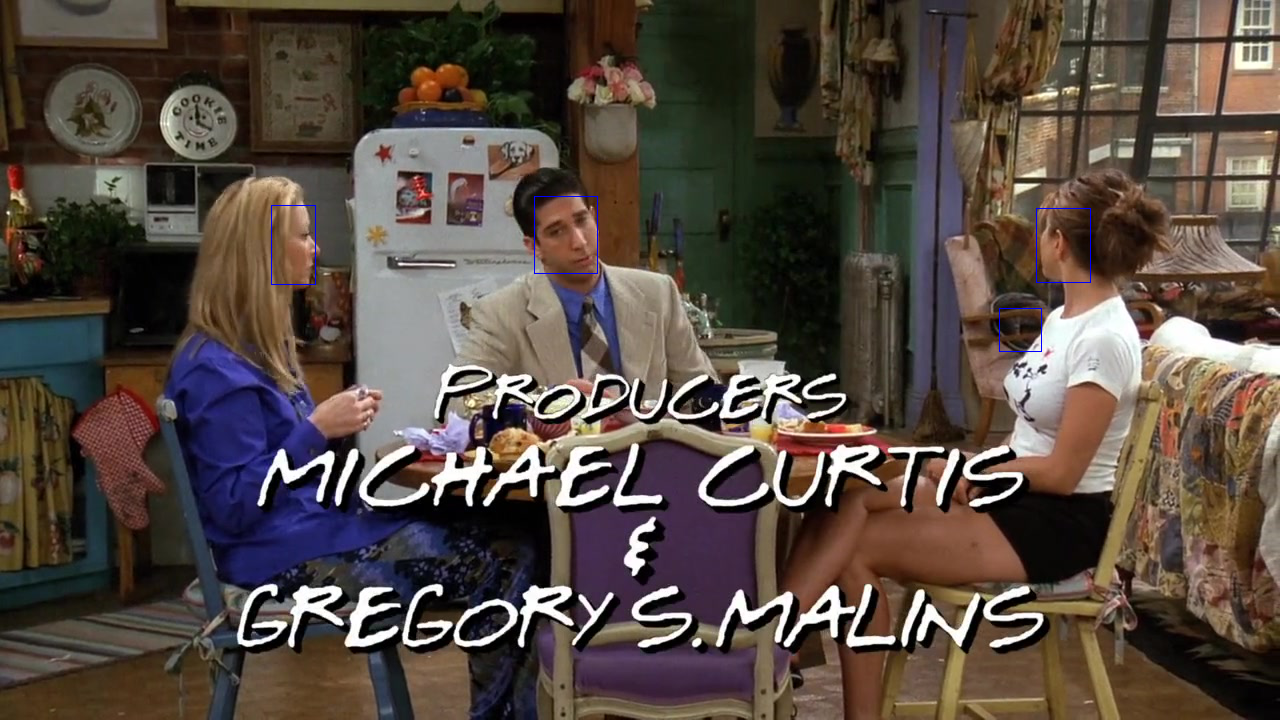

In [77]:
extract_and_show_faces(work_dir + "002400.jpg")

### Detect (MTCNN) and Crop Faces to Prepare them to VGGFace net

In [ ]:
#WE DO NOT NEED THIS
# extract a single face from a given photograph
def extract_faces_crop_save(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    #extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return pixels
 
# load the photo and extract the face
# pixels = extract_face('data/tes2.jpg')

### Extracting Features of the faces to try to use them for better tracking (VGGFace)

In [93]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, ZeroPadding2D, MaxPooling2D, \
#                                     Dropout, Flatten, Activation

# from tensorflow.keras.models import Model

In [22]:
#Code using VGGFACe similar to https://morioh.com/p/a07857cbc76d
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine
from tensorflow.keras.layers import Layer, InputSpec
#from tensorflow.keras.engine import  Model
from tensorflow.keras.layers import Input




def crop_faces_arrays(filename, required_size=(160, 160)):
       
    # extract a single face from a given photograph
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    
    faces_arrays = []
    #extract the bounding box from the first face
    for res in results:
        x1, y1, width, height = res['box']
        # bug fix
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        # extract the face
        face = pixels[y1:y2, x1:x2]
        # resize pixels to the model size
        image = Image.fromarray(face)
        image = image.resize(required_size)
        face_array = asarray(image)
        faces_arrays.append(face_array)
    return faces_arrays
 


# def get_faces_features(faces): #we can provide the direct list of all the faces
#     samples = asarray(faces, 'float32')

#     # prepare the data for the model
#     samples = preprocess_input(samples, version=2)
    
#     # create a vggface model object
#     model = VGGFace(model='resnet50',
#       include_top=False,
#       input_shape=(224, 224, 3),
#       pooling='avg')

#     # perform prediction
#     return model.predict(samples)

# def get_face_features(imagePath):
#     faces = crop_faces_arrays(imagePath)
#     get_faces_features(faces)

In [23]:
# get_face_features(word_dir + "002400.jpg")
# vggface = VGGFace(model='vgg16')
# model = VGGFace()
#       include_top=False,
#       input_shape=(224, 224, 3),
#       pooling='avg')


In [60]:

# # check version of keras_vggface
# import keras_vggface
# # print version
# print(keras_vggface.__version__)


# # example of creating a face embedding
# from keras_vggface.vggface import VGGFace
# # create a vggface2 model
# model = VGGFace(model='resnet50')
# # summarize input and output shape
# print('Inputs: %s' % model.inputs)
# print('Outputs: %s' % model.outputs)

### Trying face_regognition based on face encoding because VGGNet did not work

In [125]:
import face_recognition

picture_of_me = face_recognition.load_image_file("data/characters/ross.png")
my_face_encoding = face_recognition.face_encodings(picture_of_me)[0]

# my_face_encoding now contains a universal 'encoding' of my facial features that can be compared to any other picture of a face!

unknown_picture = face_recognition.load_image_file("data/characters/chandler.png")
unknown_face_encoding = face_recognition.face_encodings(unknown_picture)[0]

# Now we can see the two face encodings are of the same person with `compare_faces`!
#print(unknown_face_encoding)
results = face_recognition.compare_faces([my_face_encoding], unknown_face_encoding)


                ##TODO NEED TO NORMALIZE THE DATA MAYBE??
if results[0] == True:
    print("It's a picture of me!")
else:
    print("It's not a picture of me!")

It's not a picture of me!


In [186]:
## A function that loads the faces of possible characters from a directory and saves there encodings and names
import face_recognition
import glob, os
def get_character_encodings():
    characters = {}
    
    for file in glob.glob("data/characters/*.png"):
        
        name = os.path.basename(file).split(".")[0].split("_")[0]
        #print(name)
        if name not in characters.keys():
            characters[name] = []
            
        picture = face_recognition.load_image_file(file)
        encoding = face_recognition.face_encodings(picture)[0]
        characters[name].append(encoding)

    return characters



def get_characters_from_frame(characters, frame):
    picture = face_recognition.load_image_file("data/frames/"+frame)
    # print(picture)
    encodings = face_recognition.face_encodings(picture)
    #print(len(encodings))
    present_charac = []
    for enc in encodings:
        for c in characters.keys():
            results = face_recognition.compare_faces(characters[c], enc)
            if all(results):
                present_charac.append(c)
#                 print("we found ", c, " in the image!")
    #print(present_charac)
    return present_charac
#get_character_encodings()


In [187]:
characters = get_character_encodings()

In [188]:
get_characters_from_frame(characters, "003609.jpg")

['chandler']

### Scene Detection Based on change in scene distribution with different shots

In [1]:
# The idea discussed with the professor is to look for features of the scene from the pre-trained model
# From different shots (sample 2 frames from shots) and the when you have two consecutive shots with big difference
# in distribution order

In [6]:
# PlacesCNN for scene classification
#
# by Bolei Zhou
# last modified by Bolei Zhou, Dec.27, 2017 with latest pytorch and torchvision (upgrade your torchvision please if there is trn.Resize error)

import torch
from torch.autograd import Variable as V
import torchvision.models as models
from torchvision import transforms as trn
from torch.nn import functional as F
import os
from PIL import Image



def prepare_detect_scene_model():
    # th architecture to use
    arch = 'resnet18'

    # load the pre-trained weights
    model_file = '%s_places365.pth.tar' % arch
    if not os.access(model_file, os.W_OK):
        weight_url = 'http://places2.csail.mit.edu/models_places365/' + model_file
        os.system('wget ' + weight_url)

    model = models.__dict__[arch](num_classes=365)
    checkpoint = torch.load(model_file, map_location=lambda storage, loc: storage)
    state_dict = {str.replace(k,'module.',''): v for k,v in checkpoint['state_dict'].items()}
    model.load_state_dict(state_dict)
    model.eval()


    # load the image transformer
    centre_crop = trn.Compose([
            trn.Resize((256,256)),
            trn.CenterCrop(224),
            trn.ToTensor(),
            trn.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    # load the class label
    file_name = 'categories_places365.txt'
    if not os.access(file_name, os.W_OK):
        synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/categories_places365.txt'
        os.system('wget ' + synset_url)
    classes = list()
    with open(file_name) as class_file:
        for line in class_file:
            classes.append(line.strip().split(' ')[0][3:])
    classes = tuple(classes)
    return model




In [48]:
#--- change image name to local
def detect_scene(model, img_name):
    
    img = Image.open(img_name)
    input_img = V(centre_crop(img).unsqueeze(0))

    # forward pass
    logit = model.forward(input_img)
    h_x = F.softmax(logit, 1).data.squeeze()
    probs, idx = h_x.sort(0, True)

    #print('{} prediction on {}'.format(arch,img_name))
    # output the prediction
#     for 
    val = []
    indx = []
    for i in range(0, 5):
#         print('{:.3f} -> {}'.format(probs[i], classes[idx[i]]))
        v = probs[i].item()
        val.append(v)
        indx.append(idx[i].item())
    #no need to sort them maybe
#     print(val, indx)
    return val, indx



In [49]:
img_name = "c.jpg"
model_scene_det = prepare_detect_scene_model()


In [53]:

def frames_scene(start, end):
    #purpose is to loop over the frames 
    for c in range(start, end+1):
        img_name = "data/frames/00" + str(c) + ".jpg"
        val, idx = detect_scene(model_scene_det, img_name)
        print(c, " " , idx)

In [59]:
frames_scene(3170, 3230)

3170   [53, 284, 75, 286, 99]
3171   [53, 20, 284, 75, 286]
3172   [53, 20, 284, 75, 99]
3173   [53, 20, 284, 99, 75]
3174   [53, 20, 284, 99, 286]
3175   [53, 20, 284, 99, 286]
3176   [53, 20, 284, 99, 75]
3177   [53, 20, 284, 75, 99]
3178   [53, 20, 284, 75, 120]
3179   [53, 284, 75, 20, 120]
3180   [53, 75, 284, 20, 120]
3181   [53, 284, 75, 20, 120]
3182   [53, 284, 75, 120, 99]
3183   [53, 284, 75, 99, 120]
3184   [53, 284, 99, 75, 120]
3185   [53, 99, 284, 75, 120]
3186   [53, 284, 99, 75, 20]
3187   [53, 284, 120, 75, 99]
3188   [53, 284, 120, 75, 99]
3189   [53, 284, 120, 75, 99]
3190   [53, 120, 284, 75, 99]
3191   [53, 120, 284, 75, 99]
3192   [120, 53, 284, 75, 99]
3193   [53, 120, 75, 284, 99]
3194   [53, 120, 75, 284, 99]
3195   [53, 120, 75, 284, 99]
3196   [53, 120, 75, 284, 223]
3197   [53, 223, 120, 185, 99]
3198   [146, 198, 185, 162, 223]
3199   [198, 162, 146, 179, 262]
3200   [198, 162, 146, 262, 88]
3201   [198, 162, 146, 21, 248]
3202   [21, 198, 236, 162, 19]
32

In [179]:
classes[20]

'art_school'

### Sampling frames from shots to get scene boundaries based on PlaceCNN

In [66]:
## Need to read shots from shots file and then do the sampling and scene detection
from random import randrange
# print(randrange(5,10))

8


In [205]:

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return len(lst3)

In [211]:
frame_path = "data/frames/"

shots_file = "/home/ghosto/Documents/uni/INF634/Project_Friends_Face_Tracking/data/episode01_shots.txt"
myfile = open(shots_file)


#-----

last_idx1 = []
last_idx2 = []

scene_bound = []
scene_characters = {}
scene_start_frame = 0

line_count = 322
counter = 0
print(line_count)
for line in myfile:
    print(counter,"/",line_count)
    counter+=1
    #find start and end of a shot
    start = int(line.split(" ")[0])
    end = int(line.split(" ")[1])
    
    #sample random frames from start to end
    frame_1 = randrange(start, end + 1)
    frame_2 = randrange(start, end + 1)
    
    
    #find frame name based on number
    dif1 = 6 - len(str(frame_1)) #6 is based on the zero padding in image names
    dif2 = 6 - len(str(frame_2))
    
    frame1_file = "0"*dif1 + str(frame_1) + ".jpg" 
    frame2_file = "0"*dif2 + str(frame_2) + ".jpg"
    
    
    frame1_path = frame_path + frame1_file 
    frame2_path = frame_path + frame2_file
    
    
    
    
    #we can use these two frames to find characters in the shot and assig them to scene
    
    #define a scene distribution for the shot based on the sampled frames
    
    
    
    #check with previous shot to know if this is a scene boundary
#     print(start, end)
#     print(frame_1, frame_2)
#     print(frame1_file, frame2_file)
    
    
    _, curr_idx1 = detect_scene(model_scene_det, frame1_path)
    _, curr_idx2 = detect_scene(model_scene_det, frame2_path)
    
    
    
#     print(curr_idx1, curr_idx2)
#     print(last_idx1, last_idx2)
    
    
    
    #print(intersection(curr_idx1, curr_idx2))
    
    #if intersection > 2 then we consider same scene? Trial 1
    
    a = max(intersection(last_idx1, curr_idx1), intersection(last_idx1, curr_idx2))
    b = max(intersection(last_idx2, curr_idx1), intersection(last_idx2, curr_idx2))
    inter = max(a, b)
    
    #print(inter)
    if inter<3:
        #consider as new scene
        #print("new scene")
        #save scene boundary
        scene_bound.append(start) #we assume that the start of this shot is in a new scene
#     else:
#         print("same scene")
        
        
    charcs= get_characters_from_frame(characters, frame1_file)
    charcs += get_characters_from_frame(characters, frame2_file)
    
#     if scene_bound[-1] not in scene_characters.keys():
#         scene_characters[scene_bound[-1]] = set() #we can her instead save the first scene predicted
#     for c in charcs:
#         scene_characters[scene_bound[-1]].add(c)

    if classes[curr_idx1[0]] not in scene_characters.keys():
        scene_characters[classes[curr_idx1[0]]] = set() #we can her instead save the first scene predicted
    for c in charcs:
        scene_characters[classes[curr_idx1[0]]].add(c)
        
        
    #update curr idx
    last_idx1 = curr_idx1.copy()
    last_idx2 = curr_idx2.copy()
    #print()
    

print(scene_characters)    

322
0 / 322
1 / 322
2 / 322
3 / 322
4 / 322
5 / 322
6 / 322
7 / 322
8 / 322
9 / 322
10 / 322
11 / 322
12 / 322
13 / 322
14 / 322
15 / 322
16 / 322
17 / 322
18 / 322
19 / 322
20 / 322
21 / 322
22 / 322
23 / 322
24 / 322
25 / 322
26 / 322
27 / 322
28 / 322
29 / 322
30 / 322
31 / 322
32 / 322
33 / 322
34 / 322
35 / 322
36 / 322
37 / 322
38 / 322
39 / 322
40 / 322
41 / 322
42 / 322
43 / 322
44 / 322
45 / 322
46 / 322
47 / 322
48 / 322
49 / 322
50 / 322
51 / 322
52 / 322
53 / 322
54 / 322
55 / 322
56 / 322
57 / 322
58 / 322
59 / 322
60 / 322
61 / 322
62 / 322
63 / 322
64 / 322
65 / 322
66 / 322
67 / 322
68 / 322
69 / 322
70 / 322
71 / 322
72 / 322
73 / 322
74 / 322
75 / 322
76 / 322
77 / 322
78 / 322
79 / 322
80 / 322
81 / 322
82 / 322
83 / 322
84 / 322
85 / 322
86 / 322
87 / 322
88 / 322
89 / 322
90 / 322
91 / 322
92 / 322
93 / 322
94 / 322
95 / 322
96 / 322
97 / 322
98 / 322
99 / 322
100 / 322
101 / 322
102 / 322
103 / 322
104 / 322
105 / 322
106 / 322
107 / 322
108 / 322
109 / 322
110 / 

In [212]:
for a in scene_characters.keys():
    print(a, " ", scene_characters[a])

stage/indoor   {'pheobe'}
pub/indoor   {'ross', 'pheobe', 'monica', 'joey', 'rachel', 'chandler'}
downtown   set()
fountain   set()
discotheque   {'rachel', 'ross', 'pheobe'}
elevator/door   {'rachel', 'joey', 'ross', 'chandler'}
dressing_room   {'joey'}
office_cubicles   {'joey', 'ross'}
gift_shop   {'pheobe', 'joey', 'chandler'}
classroom   {'chandler', 'ross'}
basement   {'rachel'}
music_studio   {'joey', 'rachel', 'pheobe', 'ross'}
hot_spring   {'rachel'}
bar   {'monica'}
beauty_salon   {'joey', 'rachel', 'monica'}
park   set()
ice_cream_parlor   {'pheobe'}
legislative_chamber   {'ross', 'pheobe'}
nursing_home   {'monica', 'joey', 'rachel', 'chandler'}
art_school   {'joey', 'monica', 'ross'}
biology_laboratory   {'pheobe', 'joey', 'ross', 'chandler'}
archive   set()
pond   set()
coffee_shop   {'pheobe', 'ross', 'monica', 'joey', 'chandler'}
museum/indoor   {'monica'}
jewelry_shop   {'ross'}
art_studio   {'joey', 'rachel', 'ross'}
butchers_shop   {'rachel', 'monica'}
ice_skating_rin

In [114]:
#After we do tracking and face recogintion of frames we label shots such that they contain certain people like 
# Joey, chandle ...
# then we use this information to give scene statistics about the presence of these people
# Voila

In [229]:
s = ""
for a in scene_characters.keys():
#     print(a, end=", ")
    a = a.replace("_", " ")
    a = a.replace("/", " ")
    s += ", " + str(a) 
print(len(scene_characters.keys()))
print()
print(s)

77

, stage indoor, pub indoor, downtown, fountain, discotheque, elevator door, dressing room, office cubicles, gift shop, classroom, basement, music studio, hot spring, bar, beauty salon, park, ice cream parlor, legislative chamber, nursing home, art school, biology laboratory, archive, pond, coffee shop, museum indoor, jewelry shop, art studio, butchers shop, ice skating rink outdoor, catacomb, fire escape, beer garden, restaurant, flea market indoor, restaurant kitchen, living room, kitchen, chemistry lab, utility room, office, hospital room, pizzeria, slum, general store indoor, conference center, pharmacy, movie theater indoor, airplane cabin, auditorium, dining hall, bookstore, food court, nursery, recreation room, physics laboratory, waiting room, veterinarians office, art gallery, jail cell, bank vault, pantry, science museum, television studio, reception, bedroom, hotel room, dorm room, operating room, storage room, home theater, lobby, shoe shop, berth, beer hall, boxing ring

In [222]:
for i in range(3190, 3209):
    frame1_path = frame_path + "00" + str(i) + ".jpg"
    
    val, curr_idx1 = detect_scene(model_scene_det, frame1_path)
    cla = []
    for j in curr_idx1:
        cla.append(classes[j])
    print("Frame:", i)
    print( "Scenes:", cla[:2])
    print("Prob.:", val[:2])
    print()
    


Frame: 3190
Scenes: ['beer_garden', 'dining_hall']
Prob.: [0.17265677452087402, 0.1575317531824112]

Frame: 3191
Scenes: ['beer_garden', 'dining_hall']
Prob.: [0.19177252054214478, 0.17684224247932434]

Frame: 3192
Scenes: ['dining_hall', 'beer_garden']
Prob.: [0.19894883036613464, 0.16764406859874725]

Frame: 3193
Scenes: ['beer_garden', 'dining_hall']
Prob.: [0.19346509873867035, 0.17421983182430267]

Frame: 3194
Scenes: ['beer_garden', 'dining_hall']
Prob.: [0.18604643642902374, 0.15383481979370117]

Frame: 3195
Scenes: ['beer_garden', 'dining_hall']
Prob.: [0.21264232695102692, 0.1185794547200203]

Frame: 3196
Scenes: ['beer_garden', 'dining_hall']
Prob.: [0.1330116093158722, 0.09506527334451675]

Frame: 3197
Scenes: ['beer_garden', 'market/outdoor']
Prob.: [0.10517697781324387, 0.06423811614513397]

Frame: 3198
Scenes: ['flea_market/indoor', 'jewelry_shop']
Prob.: [0.07503433525562286, 0.07052400708198547]

Frame: 3199
Scenes: ['jewelry_shop', 'gift_shop']
Prob.: [0.20711961388587

['pheobe', 'joey', 'rachel', 'ross', 'chandler', 'monica']
[0, 0, 0, 0, 0, 0]


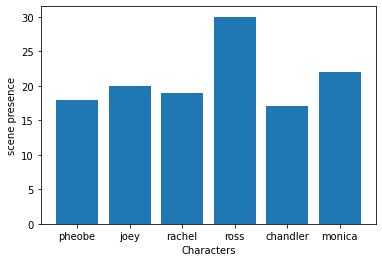

In [242]:
charc = list(characters.keys())
vals = [0]*len(charc)
print(charc)
print(vals)
for a in scene_characters.keys():
    for c in range(len(charc)):
        if charc[c] in scene_characters[a]:
            vals[c] += 1
            
            
    
    
import matplotlib.pyplot as plt
import numpy as np


plt.bar(charc, vals)  # density=False would make counts
plt.ylabel('scene presence')
plt.xlabel('Characters')
plt.savefig('scene_count_per_character.png')
plt.show()

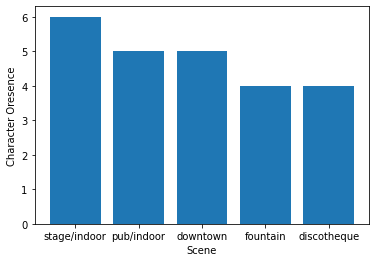

In [251]:
charc2 = list(scene_characters.keys())
val = [0]*len(charc2)
cou = 0
for a in scene_characters.keys():
    val[cou]  = len(scene_characters[a])
    cou+=1
            
            
    
[x for _, x in sorted(zip(val, charc2), key=lambda pair: pair[0])]

val.sort(reverse=True)
plt.bar(charc2[:5], val[:5])  # density=False would make counts
plt.ylabel('Character Oresence')
plt.xlabel('Scene')
plt.savefig('char_count_per_scene.png')
plt.show()